In [1]:
# execute this cell before you start

import tensorflow as tf
import tensorflow.keras as keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)
print(tf.keras.__version__)

2.12.0
2.12.0


# The Reuters newswire data

Consider the data in  `tensorflow.keras.datasets.reuters` and train a network which reliably categorizes the newswires.  

Hints: 
- some general explanations of all the datasets included in Keras is here: https://keras.io/datasets/
After `from tensorflow.keras.datasets import reuters` you can get the dataset and the word index with through `reuters.get_word_index()` and `reuters.load_data()`.  The training labels correspond to different topics for each newswire.  The list of topics can be found here: https://github.com/keras-team/keras/issues/12072. 
\


###  Download reuters dataset and created four numpy arrays which contains the data. The data is split into training and testing data.

In [2]:
reuters = keras.datasets.reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data()

### Check the data type, lengths, shape and look at each data set.

In [3]:
type(train_data), train_data.shape

(numpy.ndarray, (8982,))

In [4]:
type(reuters.load_data())

tuple

In [5]:
len(train_data[20]), len(train_data[21]), len(train_data[22]), len(train_data[23])

(231, 108, 83, 29)

In [6]:
train_data[20]

[1,
 779,
 37,
 38,
 465,
 278,
 6623,
 55,
 900,
 6,
 18215,
 172,
 4,
 19941,
 13885,
 66,
 474,
 10,
 920,
 24,
 41,
 6432,
 9691,
 1333,
 136,
 4,
 37,
 38,
 309,
 2276,
 198,
 2020,
 364,
 2061,
 6,
 439,
 2249,
 1327,
 5,
 37,
 38,
 465,
 247,
 348,
 4,
 460,
 356,
 990,
 1589,
 8,
 136,
 1053,
 3373,
 634,
 330,
 116,
 2061,
 1185,
 6,
 15436,
 198,
 236,
 1176,
 6,
 3037,
 6448,
 1693,
 238,
 1720,
 990,
 309,
 415,
 265,
 5992,
 8945,
 1149,
 9118,
 23,
 779,
 10,
 103,
 5,
 465,
 278,
 6623,
 7,
 42,
 1267,
 6,
 6432,
 4,
 3373,
 7,
 269,
 10,
 583,
 43,
 6,
 2070,
 1762,
 6,
 30,
 3069,
 13,
 4,
 1185,
 199,
 8,
 4,
 6623,
 348,
 990,
 313,
 415,
 265,
 6016,
 5731,
 1149,
 7108,
 9816,
 29875,
 1149,
 10600,
 1460,
 13446,
 1149,
 16207,
 1251,
 13128,
 1149,
 10600,
 9,
 15861,
 10621,
 1324,
 6131,
 75,
 91,
 10269,
 172,
 4,
 66,
 474,
 10,
 1220,
 6,
 6592,
 1968,
 398,
 9,
 2841,
 22,
 342,
 203,
 4,
 1220,
 6132,
 27,
 2953,
 2412,
 11428,
 1324,
 2775,
 41,
 6717,
 4

### Obtain the word index in order to understand which number corresponds to which word. At the same time, check the index data type, lengths and items.

In [7]:
word_index = reuters.get_word_index()

In [8]:
type(word_index), len(word_index)

(dict, 30979)

In [9]:
#word_index.items()

### Shifted by 3 and the numbers from 0 to 3 have special meanings.

In [10]:
for k in word_index:
    word_index[k] += 3
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

In [11]:
word_index["good"], word_index["bad"]

(548, 1859)

### Build a reversed dictionary, which takes the numbers as keys and returns the words as values.

In [12]:
reverse_word_index = {}
for k in word_index:
    reverse_word_index[word_index[k]] = k

In [13]:
reverse_word_index = {word_index[k]:k for k in word_index}

In [14]:
reverse_word_index[52], reverse_word_index[617]

('this', 'preferred')

### Convert all numbers in a given review back into the original text.

In [15]:
for i in train_data[20]:
    print(i,reverse_word_index.get(i,"?"))

1 <START>
779 leading
37 u
38 s
465 farm
278 state
6623 senators
55 are
900 seeking
6 to
18215 insert
172 into
4 the
19941 senate's
13885 omnibus
66 trade
474 bill
10 a
920 provision
24 that
41 would
6432 broaden
9691 eligibility
1333 requirements
136 under
4 the
37 u
38 s
309 agriculture
2276 department's
198 export
2020 enhancement
364 program
2061 eep
6 to
439 include
2249 traditional
1327 buyers
5 of
37 u
38 s
465 farm
247 products
348 including
4 the
460 soviet
356 union
990 senate
1589 staff
8 said
136 under
1053 existing
3373 criteria
634 usda
330 can
116 offer
2061 eep
1185 subsidies
6 to
15436 recoup
198 export
236 markets
1176 lost
6 to
3037 competing
6448 nations'
1693 unfair
238 trading
1720 practices
990 senate
309 agriculture
415 committee
265 chairman
5992 patrick
8945 leahy
1149 d
9118 vt
23 is
779 leading
10 a
103 group
5 of
465 farm
278 state
6623 senators
7 in
42 an
1267 effort
6 to
6432 broaden
4 the
3373 criteria
7 in
269 such
10 a
583 way
43 as
6 to
2070 enable
17

### Use get(i,"?") instead of [i], to safeguard against the case, where a number is for some reason not in the dictionary.

In [16]:
def decode_review(encoded_review):
    review = ""
    for k in encoded_review:
        review += " "
        review += reverse_word_index.get(k, '?')
    return review


### Check out a number of reviews and the corresponding recommendations:

In [17]:
decode_review(train_data[20]), train_labels[20]

(" <START> leading u s farm state senators are seeking to insert into the senate's omnibus trade bill a provision that would broaden eligibility requirements under the u s agriculture department's export enhancement program eep to include traditional buyers of u s farm products including the soviet union senate staff said under existing criteria usda can offer eep subsidies to recoup export markets lost to competing nations' unfair trading practices senate agriculture committee chairman patrick leahy d vt is leading a group of farm state senators in an effort to broaden the criteria in such a way as to enable moscow to be eligible for the subsidies sources said the senators including senate finance committee chairman lloyd bentsen d tex max baucus d mont david pryor d ark john melcher d mont and thad cochran r miss also may fold into the trade bill a measure to shield pork producers and processors from canadian imports the measure sponsored by sen charles grassley r iowa would clarify 

In [18]:
reverse_word_index[8000]

'sandoz'

### Begin to preprocess the data so that it could have a better performance in the network, we need to reduce the number of words in the data.

In [19]:
reuters = keras.datasets.reuters
vocab_size = 5000
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = vocab_size)

In [20]:
vocab_size

5000

In [21]:
type(train_data),train_data.shape

(numpy.ndarray, (8982,))

### It is because the length of the individual reviews is not the same for all review, we need to normalize the input by cutting long reviews and expand short reviews by padding it

In [22]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"], padding='post', maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"], padding='post', maxlen=256)

In [23]:
type(train_data), train_data.shape

(numpy.ndarray, (8982, 256))

In [24]:
decode_review(train_data[20]), len(train_data[20])

(" <START> leading u s farm state <UNK> are seeking to <UNK> into the <UNK> <UNK> trade bill a provision that would <UNK> <UNK> requirements under the u s agriculture department's export enhancement program eep to include traditional buyers of u s farm products including the soviet union senate staff said under existing criteria usda can offer eep subsidies to <UNK> export markets lost to competing <UNK> unfair trading practices senate agriculture committee chairman <UNK> <UNK> d <UNK> is leading a group of farm state <UNK> in an effort to <UNK> the criteria in such a way as to enable moscow to be eligible for the subsidies sources said the <UNK> including senate finance committee chairman <UNK> <UNK> d <UNK> <UNK> <UNK> d <UNK> david <UNK> d <UNK> john <UNK> d <UNK> and <UNK> <UNK> r <UNK> also may <UNK> into the trade bill a measure to <UNK> pork producers and processors from canadian imports the measure <UNK> by sen charles <UNK> r iowa would <UNK> the <UNK> of industry in determini

In [25]:
print(train_data[20])

[   1  779   37   38  465  278    2   55  900    6    2  172    4    2
    2   66  474   10  920   24   41    2    2 1333  136    4   37   38
  309 2276  198 2020  364 2061    6  439 2249 1327    5   37   38  465
  247  348    4  460  356  990 1589    8  136 1053 3373  634  330  116
 2061 1185    6    2  198  236 1176    6 3037    2 1693  238 1720  990
  309  415  265    2    2 1149    2   23  779   10  103    5  465  278
    2    7   42 1267    6    2    4 3373    7  269   10  583   43    6
 2070 1762    6   30 3069   13    4 1185  199    8    4    2  348  990
  313  415  265    2    2 1149    2    2    2 1149    2 1460    2 1149
    2 1251    2 1149    2    9    2    2 1324    2   75   91    2  172
    4   66  474   10 1220    6    2 1968  398    9 2841   22  342  203
    4 1220    2   27 2953 2412    2 1324 2775   41    2    4    2    5
  182    7 4441  552   58   45  203   62 3045    2    6   37   38  398
    2  474    2   22   10  105  534   27    4  141   66  259   24  203
   22 

### After preprocess data, we could build a model in tensorflow. It is necessary to select the appropriate node, activation function, and hidden layer To build a model to analyze the data. Without good accuracy, we cannot draw some convincing conclusions.

In [26]:
vocab_size = 5000
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 64))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(46, activation=tf.nn.softmax))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 46)                782       
                                                        

### My optimizer is adam and loss function is sparse_categorical_crossentropy,the target is required to be non-onehot encoding, and onehot encoding is implemented inside this function.

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [28]:
train_N=1000
x_val = train_data[:train_N]
partial_x_train = train_data[train_N:]

y_val = train_labels[:train_N]
partial_y_train = train_labels[train_N:]


### The data will be passed 40 times in the network during the training process, the number of samples per gradient update equal to 40, use validation_split=.1 instead of validation_data, which mean taking apart from the training set at a ratio of 0.1 as the validation set, then running the model.

In [29]:
# history = model.fit(partial_x_train, partial_y_train, epochs=40, 
# batch_size=512, validation_data=(x_val, y_val), verbose=1)
history = model.fit(train_data, train_labels, epochs=40, 
                    batch_size=512, validation_split=.1, verbose=1)

Epoch 1/40
16/16 [==============================] - 10s 155ms/step - loss: 3.7936 - acc: 0.1984 - val_loss: 3.7433 - val_acc: 0.2214
Epoch 2/40
16/16 [==============================] - 2s 114ms/step - loss: 3.6692 - acc: 0.2154 - val_loss: 3.5633 - val_acc: 0.2214
Epoch 3/40
16/16 [==============================] - 2s 116ms/step - loss: 3.4076 - acc: 0.2273 - val_loss: 3.1997 - val_acc: 0.2214
Epoch 4/40
16/16 [==============================] - 2s 115ms/step - loss: 2.9573 - acc: 0.2406 - val_loss: 2.6768 - val_acc: 0.2214
Epoch 5/40
16/16 [==============================] - 2s 117ms/step - loss: 2.5440 - acc: 0.2545 - val_loss: 2.4436 - val_acc: 0.2214
Epoch 6/40
16/16 [==============================] - 2s 129ms/step - loss: 2.4016 - acc: 0.3296 - val_loss: 2.3760 - val_acc: 0.3315
Epoch 7/40
16/16 [==============================] - 2s 128ms/step - loss: 2.3443 - acc: 0.3521 - val_loss: 2.3384 - val_acc: 0.3315
Epoch 8/40
16/16 [==============================] - 2s 120ms/step - loss: 2

### Check the accuracy of the model, here we can see the accuracy

In [30]:
model.evaluate(test_data, test_labels)

71/71 [==============================] - 1s 6ms/step - loss: 1.5335 - acc: 0.6118


[1.5334978103637695, 0.6117542386054993]

Use history to view the parameters and types of the model.

In [31]:
history.params

{'verbose': 1, 'epochs': 40, 'steps': 16}

In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [33]:
type(history_dict["acc"]), len(history_dict["acc"])

(list, 40)

### Consider the training loss and the validation loss, after about 5 training epochs, both losses have significantly improved. After about 25 training epochs, validation loss higher than training loss, there was some overfitting during training, I used a dropout layer in the network for regularization, but there was still a little overfitting.

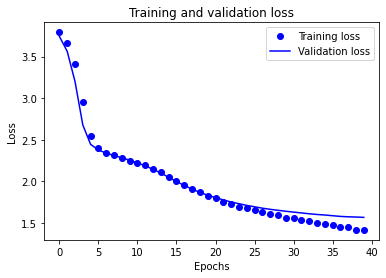

In [34]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### At the same time, in the plot of training and validation accuracy, we could see that after the 5 training epochs, the accuracy rate is gradually increasing.

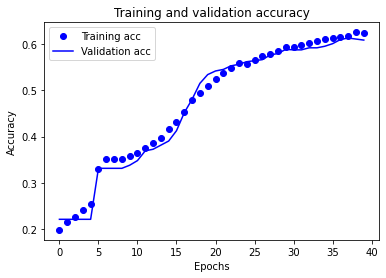

In [35]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### Calculate the direct output of the trained network for each data set in the test data and check the type of test labels:

In [36]:
model.evaluate(test_data, test_labels)

71/71 [==============================] - 0s 6ms/step - loss: 1.5335 - acc: 0.6118


[1.5334978103637695, 0.6117542386054993]

In [37]:
predict = model.predict(test_data)
type(predict), predict.shape

71/71 [==============================] - 1s 6ms/step


(numpy.ndarray, (2246, 46))

In [38]:
type(test_labels), test_labels.shape

(numpy.ndarray, (2246,))

### Calculate the error vector, by taking the difference between prediction and expected outcome and we can know which data set is correspond to error.

In [39]:
errors=[]
for i in range (45):
    errors = abs(predict[i]-test_labels[i])

In [40]:
errors.shape

(46,)

In [41]:
max(errors)

3.999998

In [42]:
np.argmax(errors)

22

### the corresponding report is given by:

In [43]:
decode_review(test_data[np.argmax(errors)]), test_labels[np.argmax(errors)]

(' <START> qtly div 57 1 2 cts vs 54 1 2 cts prior qtr pay may 15 record may 1 reuter 3 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 

In [44]:
sortedindices = np.argsort(errors)
from ipywidgets import interact

@interact(n=(0,len(errors)-1))
def myf(n):
    i = sortedindices[n]
    print(f"index: {i}; test_label {test_labels[i]}; Prediction: {predict[i]}; error: {errors[i]}")
    print(decode_review(test_data[i]))

interactive(children=(IntSlider(value=22, description='n', max=45), Output()), _dom_classes=('widget-interact'…